<a href="https://colab.research.google.com/github/Qualot/manim_colab_practice/blob/main/manim_example_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip3 install manim
!pip3 install IPython --upgrade

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
27 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
l

In [1]:
from manim import *

Manim Community v0.18.0

In [2]:
%%manim -qm -v WARNING SquareToCircle
class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

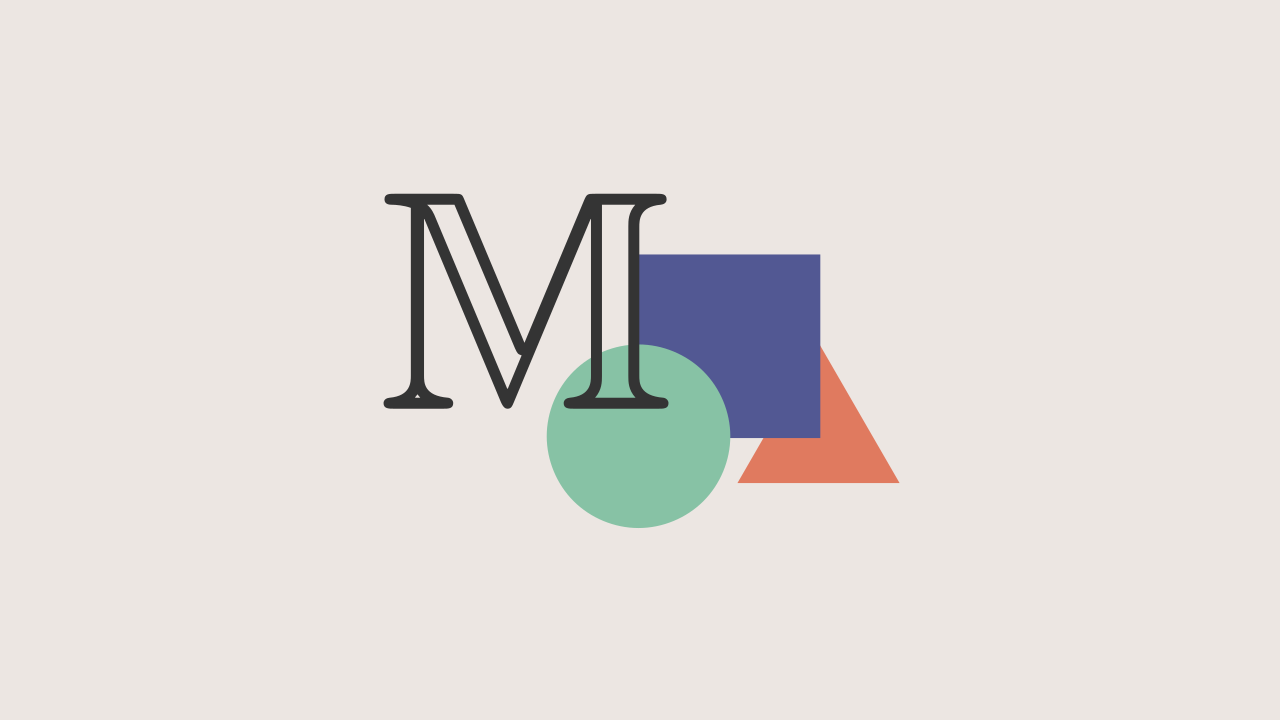

In [3]:
%%manim -qm -v WARNING ManimCELogo
class ManimCELogo(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        logo_green = "#87c2a5"
        logo_blue = "#525893"
        logo_red = "#e07a5f"
        logo_black = "#343434"
        ds_m = MathTex(r"\mathbb{M}", fill_color=logo_black).scale(7)
        ds_m.shift(2.25 * LEFT + 1.5 * UP)
        circle = Circle(color=logo_green, fill_opacity=1).shift(LEFT)
        square = Square(color=logo_blue, fill_opacity=1).shift(UP)
        triangle = Triangle(color=logo_red, fill_opacity=1).shift(RIGHT)
        logo = VGroup(triangle, square, circle, ds_m)  # order matters
        logo.move_to(ORIGIN)
        self.add(logo)

In [4]:
class SquareToCircle(Scene):
    def construct(self):
        circle = Circle()
        circle.set_fill(BLUE, opacity=0.5)
        circle.set_stroke(BLUE_E, width=4)
        square = Square()

        self.play(ShowCreation(square))
        self.wait()
        self.play(ReplacementTransform(square, circle))
        self.wait()

In [5]:
%%manim -qm -v WARNING PolygonOnAxes
class PolygonOnAxes(Scene):
    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]

    def construct(self):
        ax = Axes(
            x_range=[0, 10],
            y_range=[0, 10],
            x_length=6,
            y_length=6,
            axis_config={"include_tip": False},
        )

        t = ValueTracker(5)
        k = 25

        graph = ax.plot(
            lambda x: k / x,
            color=YELLOW_D,
            x_range=[k / 10, 10.0, 0.01],
            use_smoothing=False,
        )

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (t.get_value(), k / t.get_value())
                    )
                ]
            )
            polygon.stroke_width = 1
            polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon

        polygon = always_redraw(get_rectangle)

        dot = Dot()
        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), k / t.get_value())))
        dot.set_z_index(10)

        self.add(ax, graph, dot)
        self.play(Create(polygon))
        self.play(t.animate.set_value(10))
        self.play(t.animate.set_value(k / 10))
        self.play(t.animate.set_value(5))

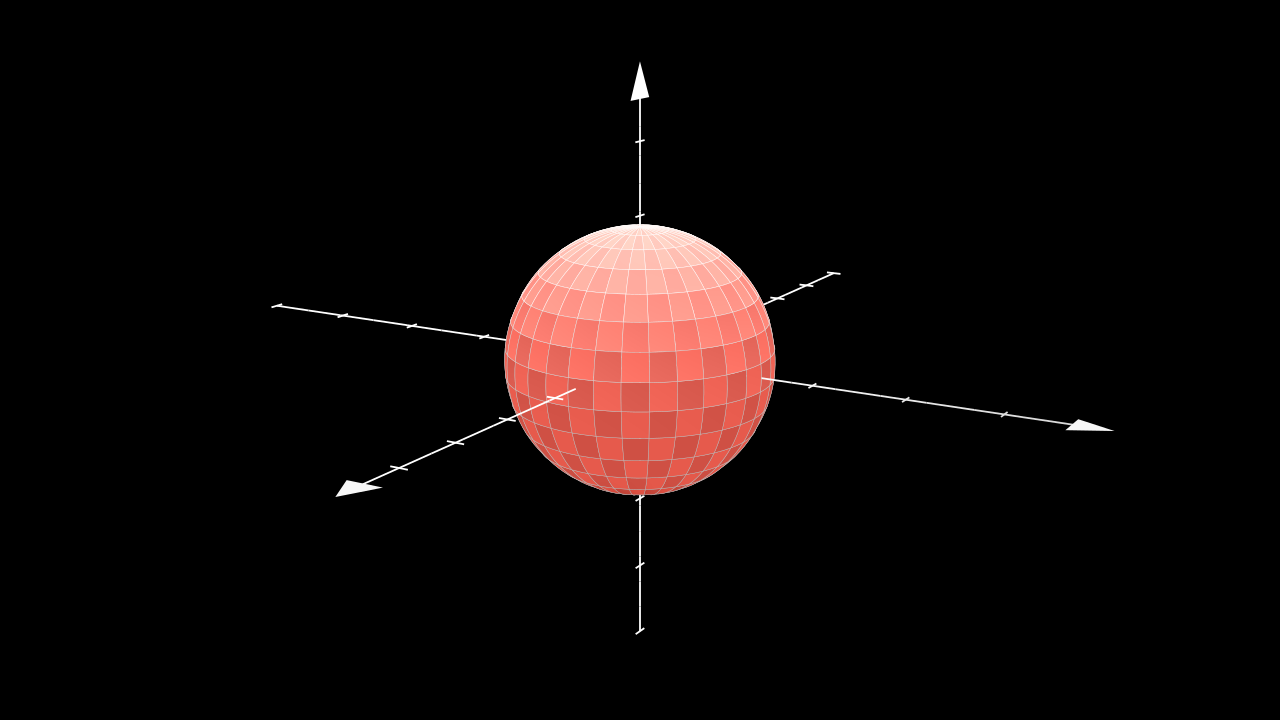

In [6]:
%%manim -qm -v WARNING ThreeDLightSourcePosition
class ThreeDLightSourcePosition(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        sphere = Surface(
            lambda u, v: np.array([
                1.5 * np.cos(u) * np.cos(v),
                1.5 * np.cos(u) * np.sin(v),
                1.5 * np.sin(u)
            ]), v_range=[0, TAU], u_range=[-PI / 2, PI / 2],
            checkerboard_colors=[RED_D, RED_E], resolution=(15, 32)
        )
        self.renderer.camera.light_source.move_to(3*IN) # changes the source of the light
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(axes, sphere)